In [1]:
from math import radians, cos, sin, asin, sqrt  
  
def haversine(lon1, lat1, lon2, lat2): # 经度1，纬度1，经度2，纬度2 （十进制度数）  
    """ 
    Calculate the great circle distance between two points  
    on the earth (specified in decimal degrees) 
    """  
    # 将十进制度数转化为弧度  
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])  
  
    # haversine公式  
    dlon = lon2 - lon1   
    dlat = lat2 - lat1   
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2  
    c = 2 * asin(sqrt(a))   
    r = 6371 # 地球平均半径，单位为公里  
    return c * r * 1000  
haversine(-70.308727, 44.4699542, -69.2335188, 44.5332462)

85561.54047998696

In [1]:
from math import*
def Distance1(Lat_A,Lng_A,Lat_B,Lng_B): #第一种计算方法
    ra=6378.140 #赤道半径
    rb=6356.755 #极半径 （km）
    flatten=(ra-rb)/ra  #地球偏率
    rad_lat_A=radians(Lat_A)
    rad_lng_A=radians(Lng_A)
    rad_lat_B=radians(Lat_B)
    rad_lng_B=radians(Lng_B)
    pA=atan(rb/ra*tan(rad_lat_A))
    pB=atan(rb/ra*tan(rad_lat_B))
    xx=acos(sin(pA)*sin(pB)+cos(pA)*cos(pB)*cos(rad_lng_A-rad_lng_B))
    c1=(sin(xx)-xx)*(sin(pA)+sin(pB))**2/cos(xx/2)**2
    c2=(sin(xx)+xx)*(sin(pA)-sin(pB))**2/sin(xx/2)**2
    dr=flatten/8*(c1-c2)
    distance=ra*(xx+dr)
    return distance
def Distance2(lat1,lng1,lat2,lng2):# 第二种计算方法
    radlat1=radians(lat1)  
    radlat2=radians(lat2)  
    a=radlat1-radlat2  
    b=radians(lng1)-radians(lng2)  
    s=2*asin(sqrt(pow(sin(a/2),2)+cos(radlat1)*cos(radlat2)*pow(sin(b/2),2)))  
    earth_radius=6378.137  
    s=s*earth_radius  
    if s<0:  
        return -s  
    else:  
        return s
Lat_A=44.4699542; Lng_A=-70.308727 
Lat_B=44.5332462; Lng_B=-69.2335188 
distance=Distance1(Lat_A,Lng_A,Lat_B,Lng_B)
print('(Lat_A, Lng_A)=({0:.6f},{1:.6f})'.format(Lat_A,Lng_A))
print('(Lat_B, Lng_B)=({0:.6f},{1:.6f})'.format(Lat_B,Lng_B))
print('Distance1={0:.3f} km'.format(distance))
print('Distance2={0:.3f} km'.format(Distance2(Lat_A,Lng_A,Lat_B,Lng_B)))

(Lat_A, Lng_A)=(44.469954,-70.308727)
(Lat_B, Lng_B)=(44.533246,-69.233519)
Distance1=85.797 km
Distance2=85.657 km


In [2]:
import pandas as pd
import numpy as np
data=pd.read_excel('E:/统计学习/farm/Clean_locations_nearest_distance_New.xlsx', 'sheet1', index_col=None, na_values=['NA'])
data

,Town,County,ZIP,FarmID,Address,Producer_name,lat,lng,nearest_distance,less50
0,Canton,Oxford,04221,MMC101,212 Canton Point Road,River Valley Farm,44.469954,-70.308727,0,NaN
1,Canton,Oxford,04221,MMC102,55 Canton Point Rd,"Conant Acres, Inc.",44.469220,-70.300376,0,NaN
2,Turner,Androscoggin,04282,MMC107,42 Main Street,"Goodnow Jersey Farm, Inc.",43.855998,-70.104498,6,NaN
3,Cornish,York,04020,MMC111,152 Towles Hill Road,"Highland Farms, Inc.",43.796541,-70.840299,16,NaN
4,Orrington,Penobscot,04474,MMC113,605 Center Drive,"Howard Farms, Inc.",44.720817,-68.788787,4,NaN
5,Dexter,Penobscot,04930,MMC114,538 Upper Garland Road,Johnson Farm,45.030018,-69.234548,2,NaN
6,Lewiston,Androscoggin,04240,MMC116,351 Cotton Road,Suchar Farm,44.016136,-70.158870,3,NaN
7,Livermore,Androscoggin,04253,MMC117,1749 River Road,"Lovewell Farms, Inc.",44.053013,-70.188596,1,NaN
8,Bethel,Oxford,04217,MMC119,384 Walkers Mills Road,Blake Farm,44.417132,-70.773044,5,NaN
9,Richmond,Sagadahoc,04357,MMC120,43 High Street,Noble Farm,44.096169,-70.227758,1,NaN


In [81]:
for j in range(335):
    for i in range(335):
      if(i!=j):
          distance=Distance2(data['lat'][j],data['lng'][j],data['lat'][i],data['lng'][i])
          if(data['nearest_distance'][j]>distance):
             data['nearest_distance'][j]= distance
             print( distance)
data


C:\Users\leo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0.6684094183218596
0.6684094183218596
70.26417156148432
59.46196612964446
33.035052109317824
32.2653299254897
26.821510666420114
20.235742190449674
18.557013230579557
14.963877937267242
86.15845778223954
59.46196612964446
29.686548863201445
16.54069147974409
123.67556229204813
49.20622715285288
35.34191538222871
4.978614253843918
105.34907475576149
104.86674155934762
49.20622715285288
43.89574728608432
12.491641372430596
11.154323097429119
2.6663460012151154
2002.06592268326
1985.646107512347
1929.7928746811128
1557.2122538077938
725.2669880197545
665.7001391928928
340.51333498360816
151.6742001036413
502.2105817346836
461.5793834674142
417.09452720958757
401.812902158669
282.18681996466654
276.72993780487997
158.20925253307226
21.25163470118276
2.3922227194180214
37.3673498591386
6.7218266470530965
5.565867337791732
1306.0428218041989
1299.1365697378326
1240.888977319031
725.2669880197545
716.2845364091708
472.4210803670515
438.9882740884593
395.81684973647367
133.87313503376157
82.83

0.4245700706100374
558.8232146868777
519.2836836525587
474.06427621502314
58.053897208428374
52.06420695765351
0.0
296.7064604139009
246.2422911649561
210.85273851075928
69.43886523613742
57.34198789696584
0.0
630.5360415877434
595.7453964018299
547.4613282498174
141.9040524642068
86.01169966531695
44.646400807791814
0.0
4341.49125822186
4311.377080153072
2951.4309109585347
2607.490626506915
990.2810870076737
22.00018361487902
212.5862048122738
129.59785859816648
110.8280341334661
97.67062320105852
7.408498267094725
3.474717757038359
150.11888447443422
95.00076892939516
69.85919918985395
68.26333255398929
64.40337513043022
55.22810023815708
52.474047371579466
36.729330651910914
18.914263214628843
9.217943836956664
50.37740558824168
20.235742190449674
12.462282358504213
8.005907625204953
2.2193597406700003
502.7819181702296
461.8709258894813
417.59889806266364
2.3922227194180214
123.10285752211865
122.51382651365675
16.206756623227214
12.71904883398427
9.50198978649741
6.433421585703090

44.87776858736314
27.411536659552716
21.94745547551798
10.116675165443455
4.3564360039167145
59.07187704933404
58.471669181108815
52.26974821462156
30.4463104896441
20.085073092087374
11.506413114285088
9.508867536158737
7.935465903111896
5.224468278326152
3.299475920613858
497.34384351836
457.92143176250374
412.5361571652793
10.895946222877734
618.3423612632262
565.7379139785575
406.98835995486934
12.803788846693935
55.95912334520631
49.69971117480632
40.66642144439915
33.67107613348398
17.83441875929038
14.527800066525405
13.952373774934854
4.673048742348581
93.69818948762916
41.674844180718935
30.13538090134543
11.082197442749793
7.3290197242863675
6.158641448337468
538.3504089916642
525.0049690199454
467.65266723235175
219.21616380782635
183.71032346721478
168.87465055159444
67.58823963745911
292.30578045776366
226.55746539046467
217.41084364286527
209.91660018689916
205.74069586622392
45.2076389911492
17.94431172919558
443.34754491490975
430.2701232312436
372.6760766409149
200.407

46.09083235856626
29.944105235904072
28.56213280214368
9.67663740274541
312.524005930344
252.33501861460974
230.7325238913267
225.99407588336524
42.88097286180605
94.95349417605674
87.8849126365377
59.651061169338114
42.93008722669238
36.941624755585245
15.038650082627939
13.406513501067138
12.096698298778831
1490.8350156824133
1466.9944562312369
1413.6857930155513
547.9534120669607
383.2805453113776
145.76470602625346
136.18978315219456
84.159694151795
83.5192208560781
69.92688327060411
53.506565599275945
41.77056795037877
33.01601768681781
8.788525586150396
7.646137808347475
5.850795318598746
42.458178683218975
30.58854614175143
11.287683470689513
6.122923970383244
1.8955663862886507
23.138917808626456
22.525803527639646
18.360773459883514
12.591632247303933
10.494552910359287
1471.1702180542275
1427.7956286402434
1385.8152671792534
899.7139037024953
777.0408942622096
322.5986579161717
310.8528653807161
219.46895095169756
707.3525723775437
655.056247572157
470.6630596225113
101.67925

10.213806607109206
0.2570005186303561
2742.42972690734
2725.4486452099727
2669.8390134560836
740.4039223944108
44.21411247685661
311.7470003632549
228.68207957735186
212.1905788958737
199.1943350378102
95.10659533908766
43.137632961909375
3.5824182547450794
1.2436289871759707
308.46623907072825
226.08886816574477
209.1355688599433
196.2674492289668
92.23019497533913
41.68238225253999
3.5824182547450794
206.51429915682465
159.97348374359663
120.49470666769854
87.56500592891476
38.64495051293493
12.684240803843062
257.8843805721724
212.78656565091114
171.7324644660926
81.97639712581739
36.89515054536855
25.965691334968312
483.5490222731702
442.1147282526565
398.22068254395566
20.21856211004976
5.294637589804189
1736.2806359528875
1707.5874607155313
1656.4975870418457
433.17639498553723
303.26056866930014
132.4378431849459
2613.5328059453354
2595.25977706384
2540.0555987216735
613.6220826060518
182.64289987984372
158.90816147532874
138.58843461743714
668.913479088779
631.9561706424203
585

,0,Town,County,ZIP,FarmID,Address,Producer_name,lat,lng,nearest_distance
0,0,Canton,Oxford,04221,MMC101,212 Canton Point Road,River Valley Farm,44.469954,-70.308727,0
1,1,Canton,Oxford,04221,MMC102,55 Canton Point Rd,"Conant Acres, Inc.",44.469220,-70.300376,0
2,2,Turner,Androscoggin,04282,MMC107,42 Main Street,"Goodnow Jersey Farm, Inc.",43.855998,-70.104498,14
3,3,Cornish,York,04020,MMC111,152 Towles Hill Road,"Highland Farms, Inc.",43.796541,-70.840299,16
4,4,Orrington,Penobscot,04474,MMC113,605 Center Drive,"Howard Farms, Inc.",44.720817,-68.788787,4
5,5,Dexter,Penobscot,04930,MMC114,538 Upper Garland Road,Johnson Farm,45.030018,-69.234548,2
6,6,Lewiston,Androscoggin,04240,MMC116,351 Cotton Road,Suchar Farm,34.264743,-89.578458,151
7,7,Livermore,Androscoggin,04253,MMC117,1749 River Road,"Lovewell Farms, Inc.",40.846791,-73.966392,2
8,8,Bethel,Oxford,04217,MMC119,384 Walkers Mills Road,Blake Farm,44.417132,-70.773044,5
9,9,Richmond,Sagadahoc,04357,MMC120,43 High Street,Noble Farm,39.400078,-84.563977,133


In [83]:
data.to_excel('E:/统计学习/farm/Clean_locations_distance.xlsx','sheet1')

In [84]:
import pandas as pd
import numpy as np
data2=pd.read_excel('E:/统计学习/farm/Clean_locations_distance.xlsx', 'sheet1', index_col=None, na_values=['NA'])
data2

,0,Town,County,ZIP,FarmID,Address,Producer_name,lat,lng,nearest_distance,less50
0,0,Canton,Oxford,04221,MMC101,212 Canton Point Road,River Valley Farm,44.469954,-70.308727,0,NaN
1,1,Canton,Oxford,04221,MMC102,55 Canton Point Rd,"Conant Acres, Inc.",44.469220,-70.300376,0,NaN
2,2,Turner,Androscoggin,04282,MMC107,42 Main Street,"Goodnow Jersey Farm, Inc.",43.855998,-70.104498,14,NaN
3,3,Cornish,York,04020,MMC111,152 Towles Hill Road,"Highland Farms, Inc.",43.796541,-70.840299,16,NaN
4,4,Orrington,Penobscot,04474,MMC113,605 Center Drive,"Howard Farms, Inc.",44.720817,-68.788787,4,NaN
5,5,Dexter,Penobscot,04930,MMC114,538 Upper Garland Road,Johnson Farm,45.030018,-69.234548,2,NaN
6,6,Lewiston,Androscoggin,04240,MMC116,351 Cotton Road,Suchar Farm,34.264743,-89.578458,151,NaN
7,7,Livermore,Androscoggin,04253,MMC117,1749 River Road,"Lovewell Farms, Inc.",40.846791,-73.966392,2,NaN
8,8,Bethel,Oxford,04217,MMC119,384 Walkers Mills Road,Blake Farm,44.417132,-70.773044,5,NaN
9,9,Richmond,Sagadahoc,04357,MMC120,43 High Street,Noble Farm,39.400078,-84.563977,133,NaN


In [85]:
data2['less50']=0
data2

,0,Town,County,ZIP,FarmID,Address,Producer_name,lat,lng,nearest_distance,less50
0,0,Canton,Oxford,04221,MMC101,212 Canton Point Road,River Valley Farm,44.469954,-70.308727,0,0
1,1,Canton,Oxford,04221,MMC102,55 Canton Point Rd,"Conant Acres, Inc.",44.469220,-70.300376,0,0
2,2,Turner,Androscoggin,04282,MMC107,42 Main Street,"Goodnow Jersey Farm, Inc.",43.855998,-70.104498,14,0
3,3,Cornish,York,04020,MMC111,152 Towles Hill Road,"Highland Farms, Inc.",43.796541,-70.840299,16,0
4,4,Orrington,Penobscot,04474,MMC113,605 Center Drive,"Howard Farms, Inc.",44.720817,-68.788787,4,0
5,5,Dexter,Penobscot,04930,MMC114,538 Upper Garland Road,Johnson Farm,45.030018,-69.234548,2,0
6,6,Lewiston,Androscoggin,04240,MMC116,351 Cotton Road,Suchar Farm,34.264743,-89.578458,151,0
7,7,Livermore,Androscoggin,04253,MMC117,1749 River Road,"Lovewell Farms, Inc.",40.846791,-73.966392,2,0
8,8,Bethel,Oxford,04217,MMC119,384 Walkers Mills Road,Blake Farm,44.417132,-70.773044,5,0
9,9,Richmond,Sagadahoc,04357,MMC120,43 High Street,Noble Farm,39.400078,-84.563977,133,0


In [87]:
for j in range(335):
    for i in range(335):
      if(i!=j):
          distance=Distance2(data2['lat'][j],data2['lng'][j],data2['lat'][i],data2['lng'][i])
          if(distance<50):
             data2['less50'][j]=data2['less50'][j]+1
           
data2


C:\Users\leo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,0,Town,County,ZIP,FarmID,Address,Producer_name,lat,lng,nearest_distance,less50
0,0,Canton,Oxford,04221,MMC101,212 Canton Point Road,River Valley Farm,44.469954,-70.308727,0,42
1,1,Canton,Oxford,04221,MMC102,55 Canton Point Rd,"Conant Acres, Inc.",44.469220,-70.300376,0,41
2,2,Turner,Androscoggin,04282,MMC107,42 Main Street,"Goodnow Jersey Farm, Inc.",43.855998,-70.104498,14,36
3,3,Cornish,York,04020,MMC111,152 Towles Hill Road,"Highland Farms, Inc.",43.796541,-70.840299,16,26
4,4,Orrington,Penobscot,04474,MMC113,605 Center Drive,"Howard Farms, Inc.",44.720817,-68.788787,4,41
5,5,Dexter,Penobscot,04930,MMC114,538 Upper Garland Road,Johnson Farm,45.030018,-69.234548,2,52
6,6,Lewiston,Androscoggin,04240,MMC116,351 Cotton Road,Suchar Farm,34.264743,-89.578458,151,0
7,7,Livermore,Androscoggin,04253,MMC117,1749 River Road,"Lovewell Farms, Inc.",40.846791,-73.966392,2,13
8,8,Bethel,Oxford,04217,MMC119,384 Walkers Mills Road,Blake Farm,44.417132,-70.773044,5,20
9,9,Richmond,Sagadahoc,04357,MMC120,43 High Street,Noble Farm,39.400078,-84.563977,133,0


In [88]:
data2.to_excel('E:/统计学习/farm/Clean_locations_distance_less50.xlsx','sheet1')

In [89]:
import pandas as pd
import numpy as np
data3=pd.read_excel('E:/统计学习/farm/Clean_locations_distance_less50.xlsx', 'sheet1', index_col=None, na_values=['NA'])
data3

,0,Town,County,ZIP,FarmID,Address,Producer_name,lat,lng,nearest_distance,less50,less100
0,0,Canton,Oxford,04221,MMC101,212 Canton Point Road,River Valley Farm,44.469954,-70.308727,0,42,NaN
1,1,Canton,Oxford,04221,MMC102,55 Canton Point Rd,"Conant Acres, Inc.",44.469220,-70.300376,0,41,NaN
2,2,Turner,Androscoggin,04282,MMC107,42 Main Street,"Goodnow Jersey Farm, Inc.",43.855998,-70.104498,14,36,NaN
3,3,Cornish,York,04020,MMC111,152 Towles Hill Road,"Highland Farms, Inc.",43.796541,-70.840299,16,26,NaN
4,4,Orrington,Penobscot,04474,MMC113,605 Center Drive,"Howard Farms, Inc.",44.720817,-68.788787,4,41,NaN
5,5,Dexter,Penobscot,04930,MMC114,538 Upper Garland Road,Johnson Farm,45.030018,-69.234548,2,52,NaN
6,6,Lewiston,Androscoggin,04240,MMC116,351 Cotton Road,Suchar Farm,34.264743,-89.578458,151,0,NaN
7,7,Livermore,Androscoggin,04253,MMC117,1749 River Road,"Lovewell Farms, Inc.",40.846791,-73.966392,2,13,NaN
8,8,Bethel,Oxford,04217,MMC119,384 Walkers Mills Road,Blake Farm,44.417132,-70.773044,5,20,NaN
9,9,Richmond,Sagadahoc,04357,MMC120,43 High Street,Noble Farm,39.400078,-84.563977,133,0,NaN


In [92]:
data3['less100']=0 
data3


,0,Town,County,ZIP,FarmID,Address,Producer_name,lat,lng,nearest_distance,less50,less100
0,0,Canton,Oxford,04221,MMC101,212 Canton Point Road,River Valley Farm,44.469954,-70.308727,0,42,0
1,1,Canton,Oxford,04221,MMC102,55 Canton Point Rd,"Conant Acres, Inc.",44.469220,-70.300376,0,41,0
2,2,Turner,Androscoggin,04282,MMC107,42 Main Street,"Goodnow Jersey Farm, Inc.",43.855998,-70.104498,14,36,0
3,3,Cornish,York,04020,MMC111,152 Towles Hill Road,"Highland Farms, Inc.",43.796541,-70.840299,16,26,0
4,4,Orrington,Penobscot,04474,MMC113,605 Center Drive,"Howard Farms, Inc.",44.720817,-68.788787,4,41,0
5,5,Dexter,Penobscot,04930,MMC114,538 Upper Garland Road,Johnson Farm,45.030018,-69.234548,2,52,0
6,6,Lewiston,Androscoggin,04240,MMC116,351 Cotton Road,Suchar Farm,34.264743,-89.578458,151,0,0
7,7,Livermore,Androscoggin,04253,MMC117,1749 River Road,"Lovewell Farms, Inc.",40.846791,-73.966392,2,13,0
8,8,Bethel,Oxford,04217,MMC119,384 Walkers Mills Road,Blake Farm,44.417132,-70.773044,5,20,0
9,9,Richmond,Sagadahoc,04357,MMC120,43 High Street,Noble Farm,39.400078,-84.563977,133,0,0


In [93]:
for j in range(335):
    for i in range(335):
      if(i!=j):
          distance=Distance2(data3['lat'][j],data3['lng'][j],data3['lat'][i],data3['lng'][i])
          if(distance<100):
             data3['less100'][j]=   data3['less100'][j]+1
           
data3

C:\Users\leo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,0,Town,County,ZIP,FarmID,Address,Producer_name,lat,lng,nearest_distance,less50,less100
0,0,Canton,Oxford,04221,MMC101,212 Canton Point Road,River Valley Farm,44.469954,-70.308727,0,42,120
1,1,Canton,Oxford,04221,MMC102,55 Canton Point Rd,"Conant Acres, Inc.",44.469220,-70.300376,0,41,120
2,2,Turner,Androscoggin,04282,MMC107,42 Main Street,"Goodnow Jersey Farm, Inc.",43.855998,-70.104498,14,36,101
3,3,Cornish,York,04020,MMC111,152 Towles Hill Road,"Highland Farms, Inc.",43.796541,-70.840299,16,26,68
4,4,Orrington,Penobscot,04474,MMC113,605 Center Drive,"Howard Farms, Inc.",44.720817,-68.788787,4,41,95
5,5,Dexter,Penobscot,04930,MMC114,538 Upper Garland Road,Johnson Farm,45.030018,-69.234548,2,52,99
6,6,Lewiston,Androscoggin,04240,MMC116,351 Cotton Road,Suchar Farm,34.264743,-89.578458,151,0,0
7,7,Livermore,Androscoggin,04253,MMC117,1749 River Road,"Lovewell Farms, Inc.",40.846791,-73.966392,2,13,20
8,8,Bethel,Oxford,04217,MMC119,384 Walkers Mills Road,Blake Farm,44.417132,-70.773044,5,20,82
9,9,Richmond,Sagadahoc,04357,MMC120,43 High Street,Noble Farm,39.400078,-84.563977,133,0,0


In [95]:
data3.to_excel('E:/统计学习/farm/Clean_locations_distance_less100.xlsx','sheet1')

In [105]:
data3.columns

Index([                 0,             'Town',           'County',
                    'ZIP',           'FarmID',          'Address',
          'Producer_name',              'lat',              'lng',
       'nearest_distance',           'less50',          'less100'],
      dtype='object')

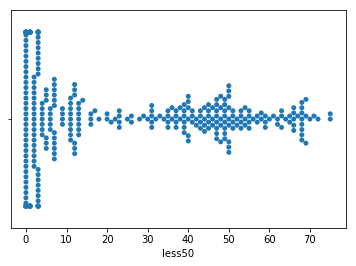

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.swarmplot(x=data3["less50"])
plt.show()

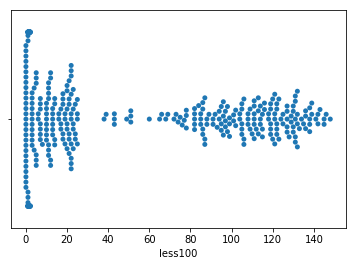

In [108]:
ax = sns.swarmplot(x=data3["less100"])
plt.show()

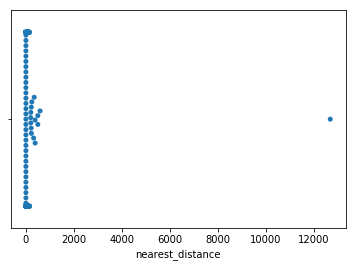

In [110]:
ax = sns.swarmplot(x=data3["nearest_distance"])
plt.show()

In [114]:
import pandas as pd
import numpy as np
data4=pd.read_excel('E:/统计学习/farm/Clean_locations_distance_less100 _drop.xlsx', 'sheet1', index_col=None, na_values=['NA'])

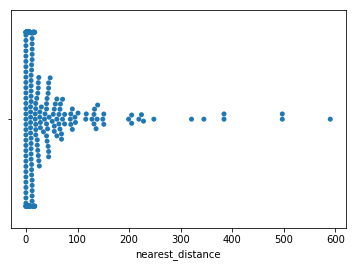

In [115]:
ax = sns.swarmplot(x=data4["nearest_distance"])
plt.show()

In [119]:
data5=pd.read_excel('E:/统计学习/farm/FarmDataDeleteWithLat.xlsx', 'sheet1', index_col=None, na_values=['NA'])
data6=pd.read_excel('E:/统计学习/farm/Clean_locations_distance_less100 _Try.xlsx', 'sheet1', index_col=None, na_values=['NA'])
data7=pd.merge(data5,data6,on=['FarmID'],how='left')
data7

,FarmID,FarmName,Time,Spring,Winter,Fall,AVC,Output,TierPrice,PriceNotier,...,Town,County_y,ZIP,Address,Producer_name,lat,lng,nearest_distance,less50,less100
0,MMC101,River Valley Farm,20041201,0,1,0,21.729977,5997.676160,20.816658,20.816658,...,Canton,Oxford,04221,212 Canton Point Road,River Valley Farm,44.469954,-70.308727,0.0,42.0,120.0
1,MMC101,River Valley Farm,20050101,0,1,0,21.729334,6093.277190,20.669462,19.854842,...,Canton,Oxford,04221,212 Canton Point Road,River Valley Farm,44.469954,-70.308727,0.0,42.0,120.0
2,MMC101,River Valley Farm,20050201,0,1,0,21.733315,5501.160560,20.583519,20.414007,...,Canton,Oxford,04221,212 Canton Point Road,River Valley Farm,44.469954,-70.308727,0.0,42.0,120.0
3,MMC101,River Valley Farm,20050301,1,0,0,21.729432,6078.831780,20.508902,19.712674,...,Canton,Oxford,04221,212 Canton Point Road,River Valley Farm,44.469954,-70.308727,0.0,42.0,120.0
4,MMC101,River Valley Farm,20050401,1,0,0,21.729573,6057.780680,20.445374,19.447159,...,Canton,Oxford,04221,212 Canton Point Road,River Valley Farm,44.469954,-70.308727,0.0,42.0,120.0
5,MMC101,River Valley Farm,20050501,1,0,0,21.727282,6398.735910,20.455935,19.312809,...,Canton,Oxford,04221,212 Canton Point Road,River Valley Farm,44.469954,-70.308727,0.0,42.0,120.0
6,MMC101,River Valley Farm,20050601,0,0,0,22.042197,21984.614910,20.541588,20.144707,...,Canton,Oxford,04221,212 Canton Point Road,River Valley Farm,44.469954,-70.308727,0.0,42.0,120.0
7,MMC101,River Valley Farm,20050701,0,0,0,22.040990,22165.744590,20.415113,20.008723,...,Canton,Oxford,04221,212 Canton Point Road,River Valley Farm,44.469954,-70.308727,0.0,42.0,120.0
8,MMC101,River Valley Farm,20050801,0,0,0,22.042497,21939.584059,20.290186,19.981319,...,Canton,Oxford,04221,212 Canton Point Road,River Valley Farm,44.469954,-70.308727,0.0,42.0,120.0
9,MMC101,River Valley Farm,20050901,0,0,1,22.050494,20740.606205,20.014615,19.663071,...,Canton,Oxford,04221,212 Canton Point Road,River Valley Farm,44.469954,-70.308727,0.0,42.0,120.0


In [123]:
data7.to_excel('E:/统计学习/farm/FarmDataDeleteWithDistance.xlsx','sheet1')

In [120]:
data_y=data7['Exit']
data_x=data7.drop(['Exit','FarmID','FarmName','Time','County_y','Address','Exit2','AVC','Output', 'RevenueNoSub','Androscoggin', 'Aroostook', 'Cumberland',
       'Franklin', 'Kennebec', 'Knox', 'Lincoln', 'Oxford', 'Penobscot','TierPrice', 'PriceNotier', 'StateSubCWT', 'StateSub','Town', 'Producer_name',
       'RevenueNoSub', 'County_x','ZIP',
       'Piscataquis', 'Sagadahoc', 'Somerset', 'Waldo', 'York', 'Exit2'],axis=1)
import xgboost as xgb
from xgboost import XGBRegressor,XGBClassifier
from sklearn.metrics import mean_squared_error,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold,StratifiedKFold
from matplotlib import  pyplot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(data_x, data_y, test_size=0.3, random_state=0)
x_valid

C:\Users\leo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,Spring,Winter,Fall,AVC1,Output1,TierPrice1,PriceNotier1,StateSubCWT1,StateSub1,RevenueNoSub1,...,TierPrice6,PriceNotier6,StateSubCWT6,StateSub6,RevenueNoSub6,lat,lng,nearest_distance,less50,less100
15918,0,0,1,23.281109,2.480767e+04,21.456860,20.137093,1.319767e+00,3.274035e+04,4.995544e+05,...,21.810251,21.265811,5.444396e-01,7.953607e+03,3.106679e+05,NaN,NaN,NaN,NaN,NaN
19727,0,0,0,22.999972,6.749970e+04,22.046611,14.938329,7.108282e+00,4.798069e+05,1.008333e+06,...,22.215977,17.212974,5.003003e+00,3.248763e+05,1.117746e+06,NaN,NaN,NaN,NaN,NaN
37084,1,0,0,42.372119,5.942832e+06,20.562239,20.562239,0.000000e+00,0.000000e+00,1.221979e+08,...,19.072705,17.665040,1.407665e+00,8.000448e+06,1.003991e+08,NaN,NaN,NaN,NaN,NaN
4152,0,1,0,24.020232,3.978880e+04,23.393755,19.494796,3.898959e+00,1.551349e+05,7.756746e+05,...,23.701974,20.533146,3.168828e+00,1.269891e+05,8.228550e+05,NaN,NaN,NaN,NaN,NaN
37727,0,0,1,22.184735,7.203434e+02,19.984458,19.083519,9.009387e-01,6.489852e+02,1.374669e+04,...,20.455935,19.312809,1.143126e+00,1.686047e+04,2.848532e+05,43.444700,-70.785723,5.0,16.0,51.0
18472,0,0,1,21.202544,1.522347e+05,20.014615,19.663071,3.515448e-01,5.351731e+04,2.993402e+06,...,20.445374,19.447159,9.982153e-01,1.324697e+05,2.580765e+06,44.640032,-69.603316,3.0,61.0,136.0
13029,0,1,0,23.704250,2.946358e+05,22.794227,22.794227,7.105427e-15,2.093513e-09,6.715995e+06,...,22.145554,21.324235,8.213186e-01,2.672955e+05,6.939904e+06,46.160020,-68.066704,16.0,7.0,11.0
33225,0,1,0,24.264826,3.112028e+03,23.487718,19.467011,4.020707e+00,1.251255e+04,6.058188e+04,...,23.746279,20.239037,3.507242e+00,1.143390e+04,6.598093e+04,NaN,NaN,NaN,NaN,NaN
30710,0,1,0,22.893332,2.008750e+04,24.745036,24.745036,3.552714e-15,7.136515e-11,4.970660e+05,...,27.480898,27.480898,0.000000e+00,0.000000e+00,5.773613e+05,NaN,NaN,NaN,NaN,NaN
10385,1,0,0,24.671781,6.829084e+04,22.304745,20.623634,1.681111e+00,1.148045e+05,1.408405e+06,...,22.468722,22.246958,2.217640e-01,1.593203e+04,1.598272e+06,44.536749,-69.597583,3.0,68.0,138.0


In [121]:
dataset1 = xgb.DMatrix(x_train,label=y_train)
dataset3 = xgb.DMatrix(x_valid)
params={'booster':'gbtree',
	    'objective': 'rank:pairwise',
	    'eval_metric':'auc',
	    'gamma':0.1,
	    'min_child_weight':1.1,
	    'max_depth':5,
	    'lambda':10,
	    'subsample':0.7,
	    'colsample_bytree':0.7,
	    'colsample_bylevel':0.7,
	    'eta': 0.01,
	    'tree_method':'exact',
	    'seed':0,
	    'nthread':12
	    }
num_round=2
bst = xgb.train(params, dataset1, num_round)
preds = bst.predict(dataset3)
print('error of ypred=%f' % (np.sum((y_valid > 0.5) != y_valid) / float(len(y_valid))))
print('ROC=%f'%roc_auc_score(y_valid,preds))

error of ypred=0.000000
ROC=0.866676


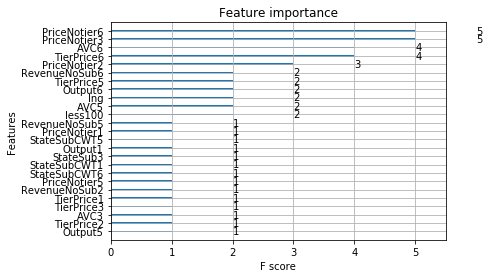

In [122]:
feature_score = bst.get_fscore()
feature_score
feature_score = sorted(feature_score.items(), key=lambda x:x[1],reverse=True)
feature_score
xgb.plot_importance(bst)
plt.show()

In [1]:
import pandas as pd
import numpy as np
from datetime import date
old_data=pd.read_excel('E:/统计学习/farm/Farm-data-change-daystime.xlsx', 'sheet1', index_col=None, na_values=['NA'])
new_data=pd.read_excel('E:/统计学习/farm/FarmDataDeleteWithDistance_day.xlsx', 'sheet1', index_col=None, na_values=['NA'])
print(old_data.columns)
print(new_data.columns)

Index(['FarmID', 'FarmName', 'Time', 'Spring', 'Winter', 'Fall', 'AVC',
       'Output', 'TierPrice', 'PriceNotier', 'StateSubCWT', 'StateSub',
       'RevenueNoSub', 'Exit', 'daystime'],
      dtype='object')
Index(['FarmID', 'FarmName', 'Time', 'Spring', 'Winter', 'Fall', 'AVC',
       'Output', 'TierPrice', 'PriceNotier', 'StateSubCWT', 'StateSub',
       'RevenueNoSub', 'Exit', 'AVC1', 'Output1', 'TierPrice1', 'PriceNotier1',
       'StateSubCWT1', 'StateSub1', 'RevenueNoSub1', 'AVC2', 'Output2',
       'TierPrice2', 'PriceNotier2', 'StateSubCWT2', 'StateSub2',
       'RevenueNoSub2', 'AVC3', 'Output3', 'TierPrice3', 'PriceNotier3',
       'StateSubCWT3', 'StateSub3', 'RevenueNoSub3', 'AVC4', 'Output4',
       'TierPrice4', 'PriceNotier4', 'StateSubCWT4', 'StateSub4',
       'RevenueNoSub4', 'AVC5', 'Output5', 'TierPrice5', 'PriceNotier5',
       'StateSubCWT5', 'StateSub5', 'RevenueNoSub5', 'AVC6', 'Output6',
       'TierPrice6', 'PriceNotier6', 'StateSubCWT6', 'StateSub6',
      

In [2]:
combine_data=new_data[['FarmID', 'FarmName', 'Time','AVC1', 'Output1', 'TierPrice1', 'PriceNotier1',
       'StateSubCWT1', 'StateSub1', 'RevenueNoSub1', 'AVC2', 'Output2',
       'TierPrice2', 'PriceNotier2', 'StateSubCWT2', 'StateSub2',
       'RevenueNoSub2', 'AVC3', 'Output3', 'TierPrice3', 'PriceNotier3',
       'StateSubCWT3', 'StateSub3', 'RevenueNoSub3', 'AVC4', 'Output4',
       'TierPrice4', 'PriceNotier4', 'StateSubCWT4', 'StateSub4',
       'RevenueNoSub4', 'AVC5', 'Output5', 'TierPrice5', 'PriceNotier5',
       'StateSubCWT5', 'StateSub5', 'RevenueNoSub5', 'AVC6', 'Output6',
       'TierPrice6', 'PriceNotier6', 'StateSubCWT6', 'StateSub6',
       'RevenueNoSub6',  'lat', 'lng',
       'nearest_distance', 'less50', 'less100']]
old_data['Time']=old_data['daystime']
old_data

,FarmID,FarmName,Time,Spring,Winter,Fall,AVC,Output,TierPrice,PriceNotier,StateSubCWT,StateSub,RevenueNoSub,Exit,daystime
0,MMC101,River Valley Farm,2004-06-01,0,0,0,21.728296,6247.748710,22.765411,22.765411,0.000000e+00,0.000000,142232.569923,0,2004-06-01
1,MMC101,River Valley Farm,2004-07-01,0,0,0,21.727075,6429.441480,20.942723,20.191249,7.514742e-01,4831.559351,129818.455353,0,2004-07-01
2,MMC101,River Valley Farm,2004-08-01,0,0,0,21.728404,6231.778910,20.931654,20.783901,1.477529e-01,920.763120,129520.678910,0,2004-08-01
3,MMC101,River Valley Farm,2004-09-01,0,0,1,21.730480,5922.908460,20.865485,20.730473,1.350120e-01,799.663480,122784.692495,0,2004-09-01
4,MMC101,River Valley Farm,2004-10-01,0,0,1,21.730149,5972.124480,20.780546,20.780546,0.000000e+00,0.000000,124104.006323,0,2004-10-01
5,MMC101,River Valley Farm,2004-11-01,0,0,1,21.732257,5658.535680,20.962484,20.962484,0.000000e+00,0.000000,118616.965639,0,2004-11-01
6,MMC101,River Valley Farm,2004-12-01,0,1,0,21.729977,5997.676160,20.816658,20.816658,0.000000e+00,0.000000,124851.575651,0,2004-12-01
7,MMC101,River Valley Farm,2005-01-01,0,1,0,21.729334,6093.277190,20.669462,19.854842,8.146200e-01,4963.705401,120981.058503,0,2005-01-01
8,MMC101,River Valley Farm,2005-02-01,0,1,0,21.733315,5501.160560,20.583519,20.414007,1.695113e-01,932.509046,112300.732273,0,2005-02-01
9,MMC101,River Valley Farm,2005-03-01,1,0,0,21.729432,6078.831780,20.508902,19.712674,7.962280e-01,4840.135856,119830.030143,0,2005-03-01


In [3]:
result_data= pd.merge(old_data,combine_data,on=['FarmID','Time'],how='left')
result_data= pd.merge(old_data,combine_data,on=['FarmID','Time'],how='left')
import datetime
result=result_data[result_data['Time'] != datetime.datetime(2004,6,1,0,0,0)]
result=result[result['Time'] != datetime.datetime(2004,7,1,0,0,0)]
result=result[result['Time'] != datetime.datetime(2004,8,1,0,0,0)]
result=result[result['Time'] != datetime.datetime(2004,9,1,0,0,0)]
result=result[result['Time'] != datetime.datetime(2004,10,1,0,0,0)]
result=result[result['Time'] != datetime.datetime(2004,11,1,0,0,0)]

result=result[result['Exit'] != 2]
result.columns

Index(['FarmID', 'FarmName_x', 'Time', 'Spring', 'Winter', 'Fall', 'AVC',
       'Output', 'TierPrice', 'PriceNotier', 'StateSubCWT', 'StateSub',
       'RevenueNoSub', 'Exit', 'daystime', 'FarmName_y', 'AVC1', 'Output1',
       'TierPrice1', 'PriceNotier1', 'StateSubCWT1', 'StateSub1',
       'RevenueNoSub1', 'AVC2', 'Output2', 'TierPrice2', 'PriceNotier2',
       'StateSubCWT2', 'StateSub2', 'RevenueNoSub2', 'AVC3', 'Output3',
       'TierPrice3', 'PriceNotier3', 'StateSubCWT3', 'StateSub3',
       'RevenueNoSub3', 'AVC4', 'Output4', 'TierPrice4', 'PriceNotier4',
       'StateSubCWT4', 'StateSub4', 'RevenueNoSub4', 'AVC5', 'Output5',
       'TierPrice5', 'PriceNotier5', 'StateSubCWT5', 'StateSub5',
       'RevenueNoSub5', 'AVC6', 'Output6', 'TierPrice6', 'PriceNotier6',
       'StateSubCWT6', 'StateSub6', 'RevenueNoSub6', 'lat', 'lng',
       'nearest_distance', 'less50', 'less100'],
      dtype='object')

In [20]:
data_y=result['Exit']
data_x=result.drop(['FarmID', 'FarmName_x', 'Time', 'Exit', 'daystime', 'FarmName_y','AVC', 'Output', 'TierPrice', 'PriceNotier',
       'StateSubCWT', 'StateSub', 'RevenueNoSub' ,'lat', 'lng'

       ],axis=1)
import xgboost as xgb
from xgboost import XGBRegressor,XGBClassifier
from sklearn.metrics import mean_squared_error,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold,StratifiedKFold
from matplotlib import  pyplot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(data_x, data_y, test_size=0.3, random_state=0)
x_valid

,Spring,Winter,Fall,AVC1,Output1,TierPrice1,PriceNotier1,StateSubCWT1,StateSub1,RevenueNoSub1,...,AVC6,Output6,TierPrice6,PriceNotier6,StateSubCWT6,StateSub6,RevenueNoSub6,nearest_distance,less50,less100
17122,1,0,0,23.447544,1.961989e+05,19.726419,18.840868,8.855513e-01,1.737442e+05,3.696558e+06,...,23.462607,1.937219e+05,22.606415,22.123679,4.827358e-01,9.351651e+04,4.285842e+06,7.0,40.0,102.0
30353,0,0,1,25.320869,9.760581e+04,22.712409,22.712409,0.000000e+00,0.000000e+00,2.216863e+06,...,24.940114,9.161225e+04,25.060451,25.060451,0.000000e+00,0.000000e+00,2.295844e+06,3.0,66.0,136.0
63612,0,0,0,25.184851,5.393179e+04,25.060451,25.060451,0.000000e+00,0.000000e+00,1.351555e+06,...,25.196392,5.217289e+04,23.861772,23.861772,0.000000e+00,0.000000e+00,1.244938e+06,6.0,38.0,131.0
39060,0,0,0,24.664977,1.348870e+05,25.060451,25.060451,0.000000e+00,0.000000e+00,3.380329e+06,...,24.692657,1.304879e+05,23.861772,23.861772,0.000000e+00,0.000000e+00,3.113672e+06,9.0,23.0,108.0
28213,0,0,0,24.567743,8.433844e+04,22.712253,18.901404,3.810849e+00,3.214011e+05,1.594115e+06,...,24.127290,8.762716e+04,22.512320,19.842754,2.669566e+00,2.339265e+05,1.738764e+06,64.0,0.0,2.0
13269,1,0,0,23.739709,1.890453e+04,21.603746,18.237207,3.366539e+00,6.364284e+04,3.447658e+05,...,23.724540,2.117750e+04,21.745862,16.759962,4.985900e+00,1.055889e+05,3.549341e+05,3.0,52.0,97.0
33061,0,0,0,23.390848,7.185976e+04,21.854293,14.598451,7.255842e+00,5.214031e+05,1.049041e+06,...,22.981488,7.033983e+04,22.159895,14.542431,7.617464e+00,5.358112e+05,1.022912e+06,497.0,0.0,0.0
11696,0,1,0,23.839345,6.736260e+04,23.322246,21.268118,2.054127e+00,1.383714e+05,1.432676e+06,...,23.836970,6.772727e+04,23.667387,21.133886,2.533501e+00,1.715871e+05,1.431340e+06,9.0,6.0,39.0
36785,0,0,1,23.854855,1.303803e+05,22.606415,22.123679,4.827358e-01,6.293923e+04,2.884492e+06,...,23.341891,1.453174e+05,24.376318,24.376318,0.000000e+00,0.000000e+00,3.542303e+06,1.0,35.0,78.0
55683,0,0,1,25.402473,2.103152e+04,22.066805,21.647626,4.191795e-01,8.815982e+03,4.552825e+05,...,24.993273,1.952690e+04,22.358335,20.853736,1.504599e+00,2.938014e+04,4.072088e+05,5.0,12.0,19.0


In [21]:
data_x.columns

Index(['Spring', 'Winter', 'Fall', 'AVC1', 'Output1', 'TierPrice1',
       'PriceNotier1', 'StateSubCWT1', 'StateSub1', 'RevenueNoSub1', 'AVC2',
       'Output2', 'TierPrice2', 'PriceNotier2', 'StateSubCWT2', 'StateSub2',
       'RevenueNoSub2', 'AVC3', 'Output3', 'TierPrice3', 'PriceNotier3',
       'StateSubCWT3', 'StateSub3', 'RevenueNoSub3', 'AVC4', 'Output4',
       'TierPrice4', 'PriceNotier4', 'StateSubCWT4', 'StateSub4',
       'RevenueNoSub4', 'AVC5', 'Output5', 'TierPrice5', 'PriceNotier5',
       'StateSubCWT5', 'StateSub5', 'RevenueNoSub5', 'AVC6', 'Output6',
       'TierPrice6', 'PriceNotier6', 'StateSubCWT6', 'StateSub6',
       'RevenueNoSub6', 'nearest_distance', 'less50', 'less100'],
      dtype='object')

In [15]:
dataset1 = xgb.DMatrix(x_train,label=y_train)
dataset3 = xgb.DMatrix(x_valid)
params={'booster':'gbtree',
	    'objective': 'rank:pairwise',
	    'eval_metric':'auc',
	    'gamma':0.1,
	    'min_child_weight':1.1,
	    'max_depth':5,
	    'lambda':10,
	    'subsample':0.7,
	    'colsample_bytree':0.7,
	    'colsample_bylevel':0.7,
	    'eta': 0.01,
	    'tree_method':'exact',
	    'seed':0,
	    'nthread':12
	    }
num_round=2
bst = xgb.train(params, dataset1, num_round)
preds = bst.predict(dataset3)
print('error of ypred=%f' % (np.sum((y_valid > 0.5) != y_valid) / float(len(y_valid))))
print('ROC=%f'%roc_auc_score(y_valid,preds))

error of ypred=0.000000
ROC=0.808228


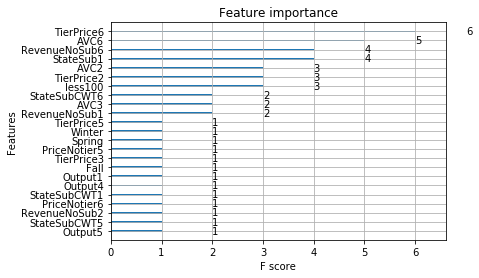

In [16]:
feature_score = bst.get_fscore()
feature_score
feature_score = sorted(feature_score.items(), key=lambda x:x[1],reverse=True)
feature_score
xgb.plot_importance(bst)
plt.show()

In [22]:
result.to_excel('E:/统计学习/farm/Farm-data-change-daystime-clean.xlsx','sheet1')

In [1]:
import pandas as pd
import numpy as np
from datetime import date
result=pd.read_excel('E:/统计学习/farm/Farm-data-change-daystime-clean.xlsx', 'sheet1', index_col=None, na_values=['NA'])
result

,FarmID,FarmName_x,Time,Spring,Winter,Fall,AVC,Output,TierPrice,PriceNotier,...,TierPrice6,PriceNotier6,StateSubCWT6,StateSub6,RevenueNoSub6,lat,lng,nearest_distance,less50,less100
6,MMC101,River Valley Farm,2004-12-01,0,1,0,21.729977,5997.676160,20.816658,20.816658,...,22.765411,22.765411,0.000000e+00,0.000000e+00,1.422326e+05,44.469954,-70.308727,0.0,42.0,120.0
7,MMC101,River Valley Farm,2005-01-01,0,1,0,21.729334,6093.277190,20.669462,19.854842,...,20.942723,20.191249,7.514742e-01,4.831559e+03,1.298185e+05,44.469954,-70.308727,0.0,42.0,120.0
8,MMC101,River Valley Farm,2005-02-01,0,1,0,21.733315,5501.160560,20.583519,20.414007,...,20.931654,20.783901,1.477529e-01,9.207631e+02,1.295207e+05,44.469954,-70.308727,0.0,42.0,120.0
9,MMC101,River Valley Farm,2005-03-01,1,0,0,21.729432,6078.831780,20.508902,19.712674,...,20.865485,20.730473,1.350120e-01,7.996635e+02,1.227847e+05,44.469954,-70.308727,0.0,42.0,120.0
10,MMC101,River Valley Farm,2005-04-01,1,0,0,21.729573,6057.780680,20.445374,19.447159,...,20.780546,20.780546,0.000000e+00,0.000000e+00,1.241040e+05,44.469954,-70.308727,0.0,42.0,120.0
11,MMC101,River Valley Farm,2005-05-01,1,0,0,21.727282,6398.735910,20.455935,19.312809,...,20.962484,20.962484,0.000000e+00,0.000000e+00,1.186170e+05,44.469954,-70.308727,0.0,42.0,120.0
12,MMC101,River Valley Farm,2005-06-01,0,0,0,22.042197,21984.614910,20.541588,20.144707,...,20.816658,20.816658,0.000000e+00,0.000000e+00,1.248516e+05,44.469954,-70.308727,0.0,42.0,120.0
13,MMC101,River Valley Farm,2005-07-01,0,0,0,22.040990,22165.744590,20.415113,20.008723,...,20.669462,19.854842,8.146200e-01,4.963705e+03,1.209811e+05,44.469954,-70.308727,0.0,42.0,120.0
14,MMC101,River Valley Farm,2005-08-01,0,0,0,22.042497,21939.584059,20.290186,19.981319,...,20.583519,20.414007,1.695113e-01,9.325090e+02,1.123007e+05,44.469954,-70.308727,0.0,42.0,120.0
15,MMC101,River Valley Farm,2005-09-01,0,0,1,22.050494,20740.606205,20.014615,19.663071,...,20.508902,19.712674,7.962280e-01,4.840136e+03,1.198300e+05,44.469954,-70.308727,0.0,42.0,120.0


In [2]:
result_index=result.reset_index()
result_index['max_AVC']=0
result_index['min_AVC']=0
result_index['max_Output']=0
result_index['min_Output']=0
result_index['max_TierPrice']=0
result_index['min_TierPrice']=0
result_index['max_PriceNotier']=0
result_index['min_PriceNotier']=0
result_index['max_StateSubCWT']=0
result_index['min_StateSubCWT']=0
result_index['max_StateSub']=0
result_index['min_StateSub']=0
for i in range(len(result_index)):
    result_index['max_AVC'][i]=max(result_index['AVC1'][i],result_index['AVC2'][i],result_index['AVC3'][i]
                                   ,result_index['AVC4'][i],result_index['AVC5'][i],result_index['AVC6'][i])
    result_index['min_AVC'][i]=min(result_index['AVC1'][i],result_index['AVC2'][i],result_index['AVC3'][i]
                                   ,result_index['AVC4'][i],result_index['AVC5'][i],result_index['AVC6'][i])
    result_index['max_Output'][i]=max(result_index['Output1'][i],result_index['Output2'][i],result_index['Output3'][i]
                                   ,result_index['Output4'][i],result_index['Output5'][i],result_index['Output6'][i])
    result_index['min_Output'][i]=min(result_index['Output1'][i],result_index['Output2'][i],result_index['Output3'][i]
                                   ,result_index['Output4'][i],result_index['Output5'][i],result_index['Output6'][i])
    result_index['max_TierPrice'][i]=max(result_index['TierPrice1'][i],result_index['TierPrice2'][i],result_index['TierPrice3'][i]
                                   ,result_index['TierPrice4'][i],result_index['TierPrice5'][i],result_index['TierPrice6'][i])
    result_index['min_TierPrice'][i]=min(result_index['TierPrice1'][i],result_index['TierPrice2'][i],result_index['TierPrice3'][i]
                                   ,result_index['TierPrice4'][i],result_index['TierPrice5'][i],result_index['TierPrice6'][i])
    result_index['max_PriceNotier'][i]=max(result_index['PriceNotier1'][i],result_index['PriceNotier2'][i],result_index['PriceNotier3'][i]
                                   ,result_index['PriceNotier4'][i],result_index['PriceNotier5'][i],result_index['PriceNotier6'][i])
    result_index['min_PriceNotier'][i]=min(result_index['PriceNotier1'][i],result_index['PriceNotier2'][i],result_index['PriceNotier3'][i]
                                   ,result_index['PriceNotier4'][i],result_index['PriceNotier5'][i],result_index['PriceNotier6'][i])
    result_index['max_StateSubCWT'][i]=max(result_index['StateSubCWT1'][i],result_index['StateSubCWT2'][i],result_index['StateSubCWT3'][i]
                                   ,result_index['StateSubCWT4'][i],result_index['StateSubCWT5'][i],result_index['StateSubCWT6'][i])
    result_index['min_StateSubCWT'][i]=min(result_index['StateSubCWT1'][i],result_index['StateSubCWT2'][i],result_index['StateSubCWT3'][i]
                                   ,result_index['StateSubCWT4'][i],result_index['StateSubCWT5'][i],result_index['StateSubCWT6'][i])
    result_index['max_StateSub'][i]=max(result_index['StateSub1'][i],result_index['StateSub2'][i],result_index['StateSub3'][i]
                                   ,result_index['StateSub4'][i],result_index['StateSub5'][i],result_index['StateSub6'][i])
    result_index['min_StateSub'][i]=min(result_index['StateSub1'][i],result_index['StateSub2'][i],result_index['StateSub3'][i]
                                   ,result_index['StateSub4'][i],result_index['StateSub5'][i],result_index['StateSub6'][i])
    


C:\Users\leo\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\leo\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\leo\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\leo\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [4]:
result_index.to_excel('E:/统计学习/farm/Farm-data-change-daystime-clean-feature.xlsx','sheet1')


In [12]:
result_index['AVC_mean']=(result_index['AVC1']+result_index['AVC2']+result_index['AVC3']+result_index['AVC4']
                          +result_index['AVC5']+result_index['AVC6'])/6
result_index['Output_mean']=(result_index['Output1']+result_index['Output2']+result_index['AVC3']+result_index['Output4']
                          +result_index['Output5']+result_index['Output6'])/6
result_index['TierPrice_mean']=(result_index['TierPrice1']+result_index['TierPrice2']+result_index['TierPrice3']+result_index['TierPrice4']
                          +result_index['TierPrice5']+result_index['TierPrice6'])/6
result_index['PriceNotier_mean']=(result_index['PriceNotier1']+result_index['PriceNotier2']+result_index['PriceNotier3']+result_index['PriceNotier4']
                          +result_index['PriceNotier5']+result_index['PriceNotier6'])/6
result_index['StateSubCWT_mean']=(result_index['StateSubCWT1']+result_index['StateSubCWT2']+result_index['StateSubCWT3']+result_index['StateSubCWT4']
                          +result_index['StateSubCWT5']+result_index['StateSubCWT6'])/6
result_index['StateSub_mean']=(result_index['StateSub1']+result_index['StateSub2']+result_index['StateSub3']
                           +result_index['StateSub4'] +result_index['StateSub5']+result_index['StateSub6'])/6

In [22]:
result_index['MAX_min_AVC']=result_index['max_AVC']- result_index['min_AVC']
result_index['MAX_min_Output']=result_index['max_Output']- result_index['min_Output']
result_index['MAX_min_TierPrice']=result_index['max_TierPrice']- result_index['min_TierPrice']
result_index['MAX_min_PriceNotier']=result_index['max_PriceNotier']- result_index['min_PriceNotier']
result_index['MAX_min_StateSubCWT']=result_index['max_StateSubCWT']- result_index['min_StateSubCWT']
result_index['MAX_min_StateSub']=result_index['max_StateSub']- result_index['min_StateSub']

In [25]:
data_y=result_index['Exit']
data_x=result_index.drop(['FarmID', 'FarmName_x', 'Time', 'Exit', 'daystime', 'FarmName_y','AVC', 'Output', 'TierPrice', 'PriceNotier',
       'StateSubCWT', 'StateSub', 'RevenueNoSub'
       ],axis=1)
import xgboost as xgb
from xgboost import XGBRegressor,XGBClassifier
from sklearn.metrics import mean_squared_error,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold,StratifiedKFold
from matplotlib import  pyplot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(data_x, data_y, test_size=0.3, random_state=0)
dataset1 = xgb.DMatrix(x_train,label=y_train)
dataset3 = xgb.DMatrix(x_valid)
params={'booster':'gbtree',
	    'objective': 'rank:pairwise',
	    'eval_metric':'auc',
	    'gamma':0.1,
	    'min_child_weight':1.1,
	    'max_depth':5,
	    'lambda':10,
	    'subsample':0.7,
	    'colsample_bytree':0.7,
	    'colsample_bylevel':0.7,
	    'eta': 0.01,
	    'tree_method':'exact',
	    'seed':0,
	    'nthread':12
	    }
num_round=2
bst = xgb.train(params, dataset1, num_round)
preds = bst.predict(dataset3)
print('error of ypred=%f' % (np.sum((y_valid > 0.5) != y_valid) / float(len(y_valid))))
print('ROC=%f'%roc_auc_score(y_valid,preds))

error of ypred=0.000000
ROC=0.794564


In [26]:
x_train.columns


Index(['index', 'Spring', 'Winter', 'Fall', 'AVC1', 'Output1', 'TierPrice1',
       'PriceNotier1', 'StateSubCWT1', 'StateSub1', 'RevenueNoSub1', 'AVC2',
       'Output2', 'TierPrice2', 'PriceNotier2', 'StateSubCWT2', 'StateSub2',
       'RevenueNoSub2', 'AVC3', 'Output3', 'TierPrice3', 'PriceNotier3',
       'StateSubCWT3', 'StateSub3', 'RevenueNoSub3', 'AVC4', 'Output4',
       'TierPrice4', 'PriceNotier4', 'StateSubCWT4', 'StateSub4',
       'RevenueNoSub4', 'AVC5', 'Output5', 'TierPrice5', 'PriceNotier5',
       'StateSubCWT5', 'StateSub5', 'RevenueNoSub5', 'AVC6', 'Output6',
       'TierPrice6', 'PriceNotier6', 'StateSubCWT6', 'StateSub6',
       'RevenueNoSub6', 'lat', 'lng', 'nearest_distance', 'less50', 'less100',
       'max_AVC', 'min_AVC', 'max_Output', 'min_Output', 'max_TierPrice',
       'min_TierPrice', 'max_PriceNotier', 'min_PriceNotier',
       'max_StateSubCWT', 'min_StateSubCWT', 'max_StateSub', 'min_StateSub',
       'AVC_mean', 'Output_mean', 'TierPrice_mean', 'Pr

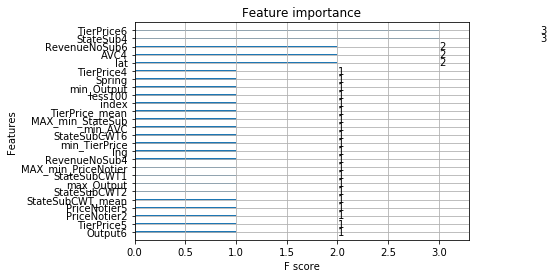

In [27]:
feature_score = bst.get_fscore()
feature_score
feature_score = sorted(feature_score.items(), key=lambda x:x[1],reverse=True)
feature_score
xgb.plot_importance(bst)
plt.show()

In [28]:
result_index.to_excel('E:/统计学习/farm/Farm-data-change-daystime-clean-feature.xlsx','sheet1')

In [1]:
import pandas as pd
import numpy as np
from datetime import date
result_index=pd.read_excel('E:/统计学习/farm/Farm-data-change-daystime-clean-feature.xlsx', 'sheet1', index_col=None, na_values=['NA'])
data_y=result_index['Exit']
data_x=result_index.drop(['FarmID', 'FarmName_x', 'Time', 'Exit', 'daystime', 'FarmName_y','AVC', 'Output', 'TierPrice', 'PriceNotier',
       'StateSubCWT', 'StateSub', 'RevenueNoSub'， 'lat', 'lng', 'nearest_distance', 'less50', 'less100',

       ],axis=1)
import xgboost as xgb
from xgboost import XGBRegressor,XGBClassifier
from sklearn.metrics import mean_squared_error,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold,StratifiedKFold
from matplotlib import  pyplot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(data_x, data_y, test_size=0.3, random_state=0)
dataset1 = xgb.DMatrix(x_train,label=y_train)
dataset3 = xgb.DMatrix(x_valid)
params={'booster':'gbtree',
	    'objective': 'rank:pairwise',
	    'eval_metric':'auc',
	    'gamma':0.1,
	    'min_child_weight':1.1,
	    'max_depth':5,
	    'lambda':10,
	    'subsample':0.7,
	    'colsample_bytree':0.7,
	    'colsample_bylevel':0.7,
	    'eta': 0.01,
	    'tree_method':'exact',
	    'seed':0,
	    'nthread':12
	    }
num_round=2
bst = xgb.train(params, dataset1, num_round)
preds = bst.predict(dataset3)
print('error of ypred=%f' % (np.sum((y_valid > 0.5) != y_valid) / float(len(y_valid))))
print('ROC=%f'%roc_auc_score(y_valid,preds))

C:\Users\leo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


error of ypred=0.000000
ROC=0.794564


In [2]:
import pandas as pd
import numpy as np
from datetime import date
result=pd.read_excel('E:/统计学习/farm/Farm-data-change-daystime-clean-feature.xlsx', 'sheet1', index_col=None, na_values=['NA'])
result

,index,FarmID,FarmName_x,Time,Spring,Winter,Fall,AVC,Output,TierPrice,...,TierPrice_mean,PriceNotier_mean,StateSubCWT_mean,StateSub_mean,MAX_min_AVC,MAX_min_Output,MAX_min_TierPrice,MAX_min_PriceNotier,MAX_min_StateSubCWT,MAX_min_StateSub
0,6,MMC101,River Valley Farm,2004-12-01,0,1,0,21.729977,5997.676160,20.816658,...,21.208051,21.035678,1.723732e-01,1.091998e+03,0,771,2,2,0,4831
1,7,MMC101,River Valley Farm,2005-01-01,0,1,0,21.729334,6093.277190,20.669462,...,20.883259,20.710885,1.723732e-01,1.091998e+03,0,771,0,0,0,4831
2,8,MMC101,River Valley Farm,2005-02-01,0,1,0,21.733315,5501.160560,20.583519,...,20.837715,20.654818,1.828975e-01,1.114022e+03,0,573,0,1,0,4963
3,9,MMC101,River Valley Farm,2005-03-01,1,0,0,21.729432,6078.831780,20.508902,...,20.779692,20.593169,1.865239e-01,1.115980e+03,0,592,0,1,0,4963
4,10,MMC101,River Valley Farm,2005-04-01,1,0,0,21.729573,6057.780680,20.445374,...,20.720262,20.423535,2.967265e-01,1.789392e+03,0,592,0,1,0,4963
5,11,MMC101,River Valley Farm,2005-05-01,1,0,0,21.727282,6398.735910,20.455935,...,20.664400,20.201304,4.630958e-01,2.797220e+03,0,592,0,1,0,6046
6,12,MMC101,River Valley Farm,2005-06-01,0,0,0,22.042197,21984.614910,20.541588,...,20.579975,19.926358,6.536167e-01,4.016313e+03,0,897,0,1,1,7314
7,13,MMC101,River Valley Farm,2005-07-01,0,0,0,22.040990,22165.744590,20.415113,...,20.534130,19.814367,7.197635e-01,5.470525e+03,1,16483,0,1,1,7793
8,14,MMC101,River Valley Farm,2005-08-01,0,0,0,22.042497,21939.584059,20.290186,...,20.491739,19.840013,6.517252e-01,6.144563e+03,1,16664,0,1,1,8075
9,15,MMC101,River Valley Farm,2005-09-01,0,0,1,22.050494,20740.606205,20.014615,...,20.442850,19.767899,6.749511e-01,7.118547e+03,1,16108,0,1,1,4167


In [11]:
data_y=result['Exit']
data_x=result.drop(['FarmID', 'FarmName_x', 'Time', 'Exit', 'daystime', 'FarmName_y','AVC', 'Output', 'TierPrice', 'PriceNotier',
       'StateSubCWT', 'StateSub', 'RevenueNoSub'
       ],axis=1)
import xgboost as xgb
from xgboost import XGBRegressor,XGBClassifier
from sklearn.metrics import mean_squared_error,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold,StratifiedKFold
from matplotlib import  pyplot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(data_x, data_y, test_size=0.3, random_state=0)
dataset1 = xgb.DMatrix(x_train,label=y_train)
dataset3 = xgb.DMatrix(x_valid)
params={'booster':'gbtree',
	    'objective': 'rank:pairwise',
	    'eval_metric':'auc',
	    'gamma':0.1,
	    'min_child_weight':1.1,
	    'max_depth':5,
	    'lambda':10,
	    'subsample':0.7,
	    'colsample_bytree':0.7,
	    'colsample_bylevel':0.7,
	    'eta': 0.01,
	    'tree_method':'exact',
	    'seed':0,
	    'nthread':12
	    }
num_round=2
bst = xgb.train(params, dataset1, num_round)
preds = bst.predict(dataset3)
print('error of ypred=%f' % (np.sum((preds > 0.5) != y_valid) / float(len(y_valid))))
# from sklearn.metrics import precision_score, recall_score, f1_score 
# p = precision_score(y_valid,preds,average = None)
# r = recall_score(y_valid,preds,average = None)
# f = f1_score (y_valid,preds, average=None)
# print(p)
# print(r)
# print(f)
print('ROC=%f'%roc_auc_score(y_valid,preds))
print(preds)

error of ypred=0.128650
ROC=0.794564
[ 0.48306292  0.49680814  0.4831636  ...,  0.48956922  0.48165387
  0.4815532 ]


In [13]:
trainx=x_train
trainy=y_train
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score 
xgb1 = XGBClassifier(
            learning_rate =0.1,
            n_estimators=89,
            max_depth=9,
            min_child_weight=4,
            gamma=0.1,
            subsample=0.75,
            colsample_bytree=0.75,
            nthread=3,
            scale_pos_weight=1,
#             StratifiedKFold = True,         
            seed=1)
xgb1.fit(trainx,trainy)
# print(trainx.shape,trainy.shape,validatax.shape,validatay.shape)
preds = xgb1.predict(x_valid)
aa = accuracy_score(y_valid,preds)
print("acc",aa) 
cc = f1_score (y_valid,preds, average='macro')
print("f1",cc)
print(f1_score (y_valid,preds, average=None))


acc 0.99151040209
f1 0.518920785072
[ 0.99573631  0.04210526]
